In [5]:
import math

def nakamoto(n, q):
    p = 1-q
    s = 0
    lambd = n*q/p
    for k in range(0,n):
        s= s+ pow(math.e,-lambd)*pow(lambd,k)*(1-pow(q/p, n-k))/math.factorial(k)
    return 1-s

In [7]:
def grunspan(n,q):
    p = 1-q
    s = 0
    for k in range(0,n):
        t = pow(p,n)*pow(q,k) - pow(q,n)*pow(p,k)
        s=s+t*math.comb(k+n-1,k)
    return 1-s



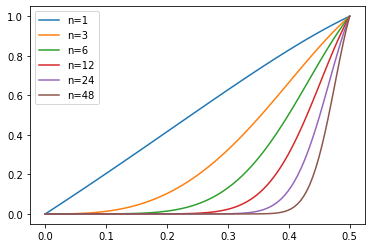

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(start=0,stop=0.5,num=100)
line1, = plt.plot(x, nakamoto(1,x), label='n=1')
line2, = plt.plot(x, nakamoto(3,x), label='n=3')
line3, = plt.plot(x, nakamoto(6,x), label='n=6')
line4, = plt.plot(x, nakamoto(12,x), label='n=12')
line5, = plt.plot(x, nakamoto(24,x), label='n=24')
line6, = plt.plot(x, nakamoto(48,x), label='n=48')
plt.legend(handles=[line1,line2,line3,line4,line5,line6], loc='upper left')
plt.show()

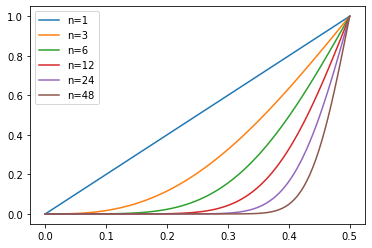

In [11]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(start=0,stop=0.5,num=100)
line1, = plt.plot(x, grunspan(1,x), label='n=1')
line2, = plt.plot(x, grunspan(3,x), label='n=3')
line3, = plt.plot(x, grunspan(6,x), label='n=6')
line4, = plt.plot(x, grunspan(12,x), label='n=12')
line5, = plt.plot(x, grunspan(24,x), label='n=24')
line6, = plt.plot(x, grunspan(48,x), label='n=48')
plt.legend(handles=[line1,line2,line3,line4,line5,line6], loc='upper left')
plt.show()

In [13]:
def find_n(f,alpha,q):
    n=1
    try:
        for i in range(1,16):
            if f(n,q) < alpha:
                return i
            n = n << 1
    except OverflowError as err:
        return 32

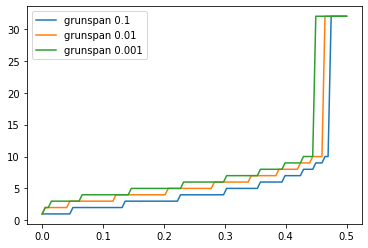

In [15]:

xs = np.linspace(start=0,stop=0.5,num=100)
y1 = map(lambda x : find_n(grunspan, 0.1, x), xs)
line1, = plt.plot(list(xs), list(y1), label='grunspan 0.1')
y2 = map(lambda x : find_n(grunspan, 0.01, x), xs)
line2, = plt.plot(list(xs), list(y2), label='grunspan 0.01')
y3 = map(lambda x : find_n(grunspan, 0.001, x), xs)
line3, = plt.plot(list(xs), list(y3), label='grunspan 0.001')
plt.legend(handles=[line1,line2,line3], loc='upper left')
plt.show()

<ipython-input-5-148cb5f993d5>:8: RuntimeWarning: overflow encountered in double_scalars
  s= s+ pow(math.e,-lambd)*pow(lambd,k)*(1-pow(q/p, n-k))/math.factorial(k)
<ipython-input-5-148cb5f993d5>:8: RuntimeWarning: invalid value encountered in double_scalars
  s= s+ pow(math.e,-lambd)*pow(lambd,k)*(1-pow(q/p, n-k))/math.factorial(k)


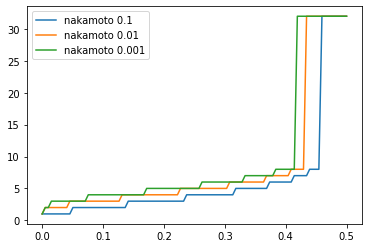

In [17]:
xs = np.linspace(start=0,stop=0.5,num=100)
y1 = map(lambda x : find_n(nakamoto, 0.1, x), xs)
line1, = plt.plot(list(xs), list(y1), label='nakamoto 0.1')
y2 = map(lambda x : find_n(nakamoto, 0.01, x), xs)
line2, = plt.plot(list(xs), list(y2), label='nakamoto 0.01')
y3 = map(lambda x : find_n(nakamoto, 0.001, x), xs)
line3, = plt.plot(list(xs), list(y3), label='nakamoto 0.001')
plt.legend(handles=[line1,line2,line3], loc='upper left')
plt.show()

In [19]:
import random

def double_spending(n,q):
    attacker = sum([random.expovariate(q) for i in range(0,n)])
    users = sum([random.expovariate(1-q) for i in range(0,n)])
    for i in range(0,300):
        if attacker < users:
            return 1
        attacker = attacker + random.expovariate(q)
        users = users + random.expovariate(1-q)
    return 0

def run_exp(n,q,r=1000):
    s=0
    for i in range(0,r):
        s = s + double_spending(n,q)
    return s/r


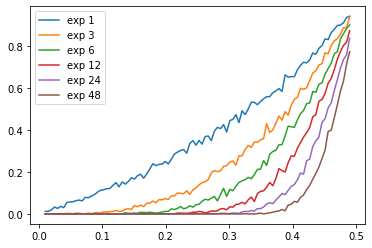

In [20]:
xs = np.linspace(start=0.01,stop=0.49,num=100)
y1 = map(lambda x : run_exp(1, x), xs)
line1, = plt.plot(list(xs), list(y1), label='exp 1')
y2 = map(lambda x : run_exp(3, x), xs)
line2, = plt.plot(list(xs), list(y2), label='exp 3')
y3 = map(lambda x : run_exp(6, x), xs)
line3, = plt.plot(list(xs), list(y3), label='exp 6')
y4 = map(lambda x : run_exp(12, x), xs)
line4, = plt.plot(list(xs), list(y4), label='exp 12')
y5 = map(lambda x : run_exp(24, x), xs)
line5, = plt.plot(list(xs), list(y5), label='exp 24')
y6 = map(lambda x : run_exp(48, x), xs)
line6, = plt.plot(list(xs), list(y6), label='exp 48')
plt.legend(handles=[line1,line2,line3,line4,line5,line6], loc='upper left')
plt.show()

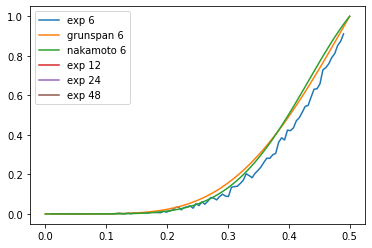

In [24]:
y3 = map(lambda x : run_exp(6, x), xs)
line1, = plt.plot(list(xs), list(y3), label='exp 6')
line2, = plt.plot(x, grunspan(6,x), label='grunspan 6')
line3, = plt.plot(x, nakamoto(6,x), label='nakamoto 6')

plt.legend(handles=[line1,line2,line3,line4,lin], loc='upper left')

plt.show()

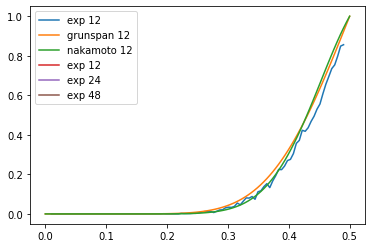

In [25]:
y3 = map(lambda x : run_exp(12, x), xs)
line1, = plt.plot(list(xs), list(y3), label='exp 12')
line2, = plt.plot(x, grunspan(12,x), label='grunspan 12')
line3, = plt.plot(x, nakamoto(12,x), label='nakamoto 12')

plt.legend(handles=[line1,line2,line3,line4,line5,line6], loc='upper left')

plt.show()

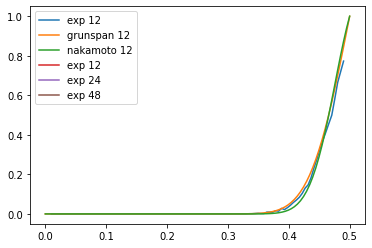

In [26]:
y3 = map(lambda x : run_exp(48, x), xs)
line1, = plt.plot(list(xs), list(y3), label='exp 12')
line2, = plt.plot(x, grunspan(48,x), label='grunspan 12')
line3, = plt.plot(x, nakamoto(48,x), label='nakamoto 12')

plt.legend(handles=[line1,line2,line3,line4,line5,line6], loc='upper left')

plt.show()